In [86]:
from sim_utils.game import GameState
from sim_utils.team import Team


t1 = Team('DET', 2025, 5)
t2 = Team('CIN', 2025, 5)

game = GameState(t1, t2)

game.reset_game()

game.play_game()

results =game.game_results(df=True)[['name','team','carries', 'receptions','targets','rushing_yards','receiving_yards']]
df = results[results.ne(0).sum(axis=1) > 2].copy() #print only players with stats
df

DET has won 17 - 13


,name,team,carries,receptions,targets,rushing_yards,receiving_yards
0,Jake Browning,CIN,5,0,0,0,0
1,Chase Brown,CIN,9,5,6,17,41
2,Samaje Perine,CIN,4,1,1,9,9
3,Tahj Brooks,CIN,1,0,0,-1,0
4,Ja'Marr Chase,CIN,0,7,11,0,80
5,Tee Higgins,CIN,0,4,10,0,28
6,Andrei Iosivas,CIN,0,1,2,0,7
10,Mike Gesicki,CIN,0,5,5,0,45
13,Jared Goff,DET,5,0,0,-1,0
14,Jahmyr Gibbs,DET,18,5,5,56,47


In [87]:
import pandas as pd

pbp = pd.DataFrame(game.pbp)
pbp

,yards,player,rusher,rusher_id,receiver,receiver_id,passer,passer_id,kicker,kicker_id,...,score_differential,wind,temp,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,spread_line,total_line,posteam_timeouts_remaining,defteam_timeouts_remaining
0,0,,None,None,None,None,None,None,None,None,...,0,2,65,900,1800,3600,-3,42,3,3
1,6,,None,None,Jahmyr Gibbs,00-0039139,Jared Goff,00-0033106,None,None,...,0,2,65,866,1766,3566,3,42,3,3
2,14,,None,None,Jahmyr Gibbs,00-0039139,Jared Goff,00-0033106,None,None,...,0,2,65,820,1720,3520,3,42,3,3
3,3,,Jahmyr Gibbs,00-0039139,None,None,None,None,None,None,...,0,2,65,781,1681,3481,3,42,3,3
4,0,,Jahmyr Gibbs,00-0039139,None,None,None,None,None,None,...,0,2,65,743,1643,3443,3,42,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0,,None,None,None,None,None,None,Evan McPherson,00-0036854,...,-7,2,65,1,1,1,-3,42,3,3
160,0,,None,None,None,None,None,None,None,None,...,4,2,65,1,1,1,3,42,3,3
161,-1,,David Montgomery,00-0035685,None,None,None,None,None,None,...,4,2,65,1,1,1,3,42,3,3
162,0,,None,None,None,None,None,None,None,None,...,4,2,65,1,1,1,3,42,3,3


In [88]:
drives = pbp.groupby(['team','drive'])['yards'].sum().reset_index()
drives['sim_flag'] = 1
drives

,team,drive,yards,sim_flag
0,CIN,0,0,1
1,CIN,2,57,1
2,CIN,4,2,1
3,CIN,6,3,1
4,CIN,8,5,1
5,CIN,10,0,1
6,CIN,12,26,1
7,CIN,14,39,1
8,CIN,16,15,1
9,CIN,18,20,1


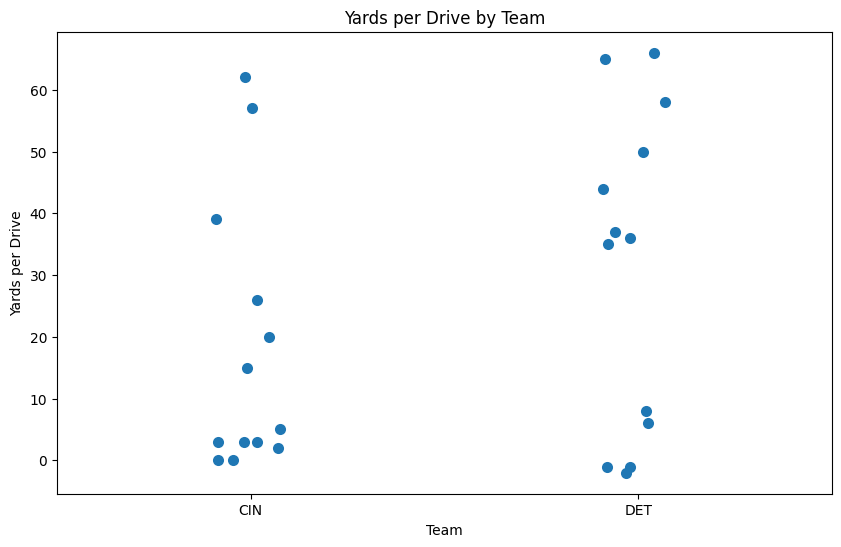

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.stripplot(data=drives, x='team', y='yards', jitter=True, size=8)

plt.title("Yards per Drive by Team")
plt.xlabel("Team")
plt.ylabel("Yards per Drive")
plt.show()


In [90]:
from utils.quack import Quack

real = Quack.query("""
			with drives as (
			select sum(yards_gained) as yards, posteam as team, drive, game_id, 0 as sim_flag
			from pbp 
			where season = 2025 
				   and week = 5
			and drive is not null
			and posteam is not null
			group by all)
			select * from drives
			--select avg(yards_per_drive) as yards_per_drive,
			--min(yards_per_drive) as yards_per_drive,
			--max(yards_per_drive) as yards_per_drive,
			-- posteam
			--from drives
			--group by all order by 1 desc
			""")

real

,yards,team,drive,game_id,sim_flag
0,85.0,DAL,4.0,2025_05_DAL_NYJ,0
1,90.0,DAL,8.0,2025_05_DAL_NYJ,0
2,20.0,NYJ,15.0,2025_05_DAL_NYJ,0
3,53.0,DAL,16.0,2025_05_DAL_NYJ,0
4,71.0,PHI,6.0,2025_05_DEN_PHI,0
...,...,...,...,...,...
289,14.0,TB,19.0,2025_05_TB_SEA,0
290,44.0,TEN,2.0,2025_05_TEN_ARI,0
291,1.0,TEN,8.0,2025_05_TEN_ARI,0
292,61.0,TEN,23.0,2025_05_TEN_ARI,0


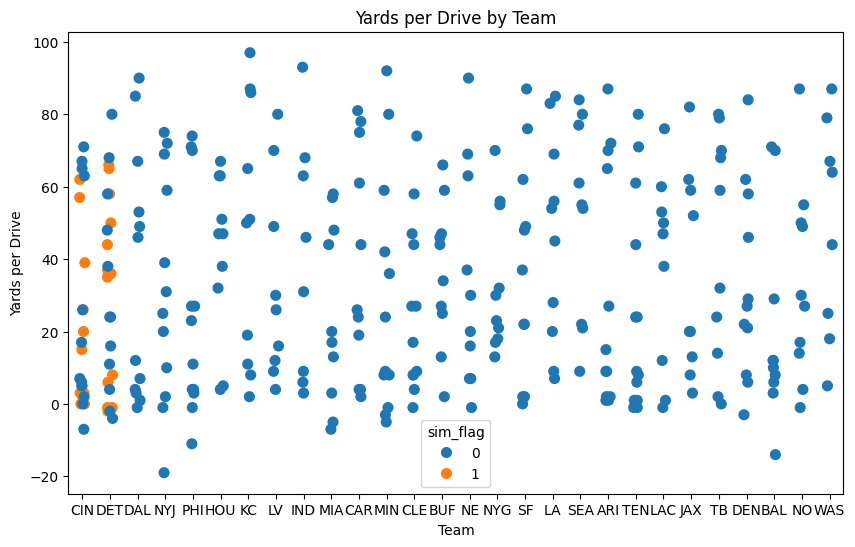

In [91]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=pd.concat((drives, real)), x='team', y='yards', hue='sim_flag', jitter=True, size=8)

plt.title("Yards per Drive by Team")
plt.xlabel("Team")
plt.ylabel("Yards per Drive")
plt.show()


In [92]:
real.loc[real.team=='DET']

,yards,team,drive,game_id,sim_flag
7,48.0,DET,3.0,2025_05_DET_CIN,0
8,11.0,DET,18.0,2025_05_DET_CIN,0
44,24.0,DET,9.0,2025_05_DET_CIN,0
67,58.0,DET,1.0,2025_05_DET_CIN,0
71,68.0,DET,20.0,2025_05_DET_CIN,0
119,4.0,DET,11.0,2025_05_DET_CIN,0
120,-4.0,DET,22.0,2025_05_DET_CIN,0
121,-2.0,DET,24.0,2025_05_DET_CIN,0
201,16.0,DET,7.0,2025_05_DET_CIN,0
202,38.0,DET,14.0,2025_05_DET_CIN,0
